In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [36]:
# Load files
train = pd.read_csv('train.csv', parse_dates = ['Datetime'])
test = pd.read_csv('test.csv', parse_dates = ['Datetime'])
samplesubmission = pd.read_csv('SampleSubmission.csv')


# Fill missing values

In [37]:
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
# define the pipeline
scaler = MinMaxScaler()
power = PowerTransformer(method='yeo-johnson')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])


In [38]:
miss_train = train.isnull().sum()
percent_train = (train.isnull().sum()/train.isnull().count())*100
missing_train = pd.concat([miss_train, percent_train], axis = 1, keys = ["Total Missing", "Percent Missing"]).sort_values(by = "Total Missing", ascending = False)
missing_train.head(7)

,Total Missing,Percent Missing
Sensor1_PM2.5,3614,1.21611
Sensor2_PM2.5,3614,1.21611
Temperature,3549,1.19424
Relative_Humidity,3549,1.19424
ID,0,0.00000
Datetime,0,0.00000
Offset_fault,0,0.00000


In [39]:
# copy dataframe



In [40]:
# Extract day, month year and hour from the Datetime column
# day
train['Datetime_day'] = train.Datetime.dt.day

# month
train['Datetime_month'] = train.Datetime.dt.month
 
# year
train['Datetime_year'] = train.Datetime.dt.year

# hour
train['Datetime_hour'] = train.Datetime.dt.hour

# Preview engineered date features
train[['Datetime', 'Datetime_day', 'Datetime_month', 'Datetime_year', 'Datetime_hour']].head()

,Datetime,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2021-11-03 04:06:31,3,11,2021,4
1,2021-11-08 18:43:23,8,11,2021,18
2,2021-11-07 09:50:33,7,11,2021,9
3,2022-01-01 18:55:15,1,1,2022,18
4,2021-11-05 22:23:48,5,11,2021,22


In [41]:
# Fill missing values with median
# Temperature
train["Temperature"] = train.groupby(["Datetime_month", "Datetime_hour"])["Temperature"].apply(lambda x:x.fillna(x.median()))
train["Temperature"] = train["Temperature"].apply(np.ceil)

# Relative_Humidity
train["Relative_Humidity"] = train.groupby(["Datetime_month", "Datetime_hour"])["Relative_Humidity"].apply(lambda x:x.fillna(x.median()))
train["Relative_Humidity"] = train["Relative_Humidity"].apply(np.ceil)

# Sensor1_PM2.5
train["Sensor1_PM2.5"] = train.groupby(["Datetime_month","Datetime_hour"])["Sensor1_PM2.5"].apply(lambda x:x.fillna(x.median()))
train["Sensor1_PM2.5"] = train["Sensor1_PM2.5"].apply(np.ceil)

# Sensor2_PM2.5
train["Sensor2_PM2.5"] = train.groupby(["Datetime_month","Datetime_hour"])["Sensor2_PM2.5"].apply(lambda x:x.fillna(x.median()))
train["Sensor2_PM2.5"] = train["Sensor2_PM2.5"].apply(np.ceil)


In [42]:
miss_train = train.isnull().sum()
percent_train = (train.isnull().sum()/train.isnull().count())*100
missing_train = pd.concat([miss_train, percent_train], axis = 1, keys = ["Total Missing", "Percent Missing"]).sort_values(by = "Total Missing", ascending = False)
missing_train.head(7)

,Total Missing,Percent Missing
ID,0,0.00000
Datetime,0,0.00000
Sensor1_PM2.5,0,0.00000
Sensor2_PM2.5,0,0.00000
Temperature,0,0.00000
Relative_Humidity,0,0.00000
Offset_fault,0,0.00000


#### filling missing values in test

In [43]:
# Extract day, month and year from the Datetime column
test['Datetime_day'] = test.Datetime.dt.day
test['Datetime_month'] = test.Datetime.dt.month
test['Datetime_year'] = test.Datetime.dt.year
test['Datetime_hour'] = test.Datetime.dt.hour

# Fill in missing values in test


# Fill missing values with median
test["Temperature"] = train.groupby(["Datetime_month", "Datetime_hour"])["Temperature"].apply(lambda x:x.fillna(x.median()))
test["Temperature"] = test["Temperature"].apply(np.ceil)


test["Relative_Humidity"] = train.groupby(["Datetime_month", "Datetime_hour"])["Relative_Humidity"].apply(lambda x:x.fillna(x.median()))
test["Relative_Humidity"] = test["Relative_Humidity"].apply(np.ceil)


test["Sensor1_PM2.5"] = test.groupby(["Datetime_month","Datetime_hour"])["Sensor1_PM2.5"].apply(lambda x:x.fillna(x.median()))
test["Sensor1_PM2.5"] = test["Sensor1_PM2.5"].apply(np.ceil)


test["Sensor2_PM2.5"] = test.groupby(["Datetime_month","Datetime_hour"])["Sensor2_PM2.5"].apply(lambda x:x.fillna(x.median()))
test["Sensor2_PM2.5"] = test["Sensor2_PM2.5"].apply(np.ceil)

test.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,91.00000,115.00000,18.00000,96.00000,28,1,2022,8
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,57.00000,53.00000,25.00000,75.00000,16,2,2022,21
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,388.00000,347.00000,25.00000,75.00000,24,1,2022,17
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,64.00000,84.00000,25.00000,70.00000,31,1,2022,7
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,70.00000,54.00000,21.00000,89.00000,31,1,2022,0


In [44]:
train = train[['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity',"Datetime_hour", "Datetime_month", 'Offset_fault']]
train.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_hour,Datetime_month,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,53.00000,50.00000,18.00000,96.00000,4,11,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,36.00000,34.00000,25.00000,75.00000,18,11,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,20.00000,24.00000,25.00000,75.00000,9,11,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,20.00000,16.00000,25.00000,70.00000,18,1,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,39.00000,35.00000,21.00000,89.00000,22,11,0


In [45]:
test = test[['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity',"Datetime_hour", "Datetime_month"]]
test.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_hour,Datetime_month
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,91.00000,115.00000,18.00000,96.00000,8,1
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,57.00000,53.00000,25.00000,75.00000,21,2
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,388.00000,347.00000,25.00000,75.00000,17,1
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,64.00000,84.00000,25.00000,70.00000,7,1
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,70.00000,54.00000,21.00000,89.00000,0,1


In [46]:
train = train.drop(["Datetime"], axis = 1)
test = test.drop(["Datetime"], axis = 1)

In [47]:
train = train.drop(["ID"], axis = 1)
test = test.drop(["ID"], axis = 1)

In [51]:
# Selecting the independent variables and the target variable
train_feats = ['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity',"Datetime_hour", "Datetime_month"]

X = train[train_feats]
y = train.Offset_fault

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)



# GradientBoostingClassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier


clf_1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=9, min_samples_split=1200,min_samples_leaf=60, subsample=0.85, random_state=10)
clf_1.fit(X_train, y_train)

# Making predictions
y_pred = clf_1.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.9321623258631133


              precision    recall  f1-score   support

           0       0.94      0.95      0.95     18632
           1       0.92      0.90      0.91     11086

    accuracy                           0.93     29718
   macro avg       0.93      0.92      0.93     29718
weighted avg       0.93      0.93      0.93     29718



# getting predictions

0    94007
1    33354
Name: Offset_fault, dtype: int64

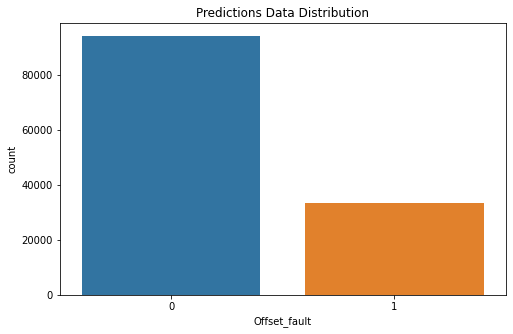

In [53]:

predictions = clf_1.predict(test)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.Offset_fault = predictions

# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title('Predictions Data Distribution');
# Create file
sub_file['Offset_fault']= sub_file['Offset_fault'].astype('int')
sub_file.to_csv('sub_final.csv', index = False)
sub_file['Offset_fault'].value_counts()

In [1]:
# with this code our team get accuracy = 0.8279 & rank = 125